In [ ]:
! pip install ta

In [2]:
import yfinance as yf
import ta
import pandas as pd

In [37]:
ticker='AAPL'
data=yf.download(ticker, start='2022-01-01', end='2024-06-30')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481155,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203217,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777817,86709100
...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200


In [38]:
def calculate_indicators(df):
  df['SMA_20']=ta.trend.sma_indicator(df['Close'], window=20)
  df['EMA_20']=ta.trend.ema_indicator(df['Close'], window=20)
  df['RSI']=ta.momentum.rsi(df['Close'], window=14)
  df['MACD']=ta.trend.macd_diff(df['Close'])
  return df
data=calculate_indicators(data)
data=data.dropna()

In [39]:
data.shape

(592, 10)

In [40]:
data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64
SMA_20,float64
EMA_20,float64
RSI,float64
MACD,float64


In [115]:
data['Volume']=data['Volume'].astype('float64')

In [116]:
data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64
SMA_20,float64
EMA_20,float64
RSI,float64
MACD,float64


In [117]:
data=data.fillna(method='bfill')

<ipython-input-117-8a50b86bf91a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


In [118]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,MACD
Date,,,,,,,,,,
2022-02-18,169.820007,170.539993,166.190002,167.300003,165.185684,82772700.0,169.754500,170.931530,42.298282,-0.247109
2022-02-22,164.979996,166.690002,162.149994,164.320007,162.243362,91162800.0,169.889500,170.301862,38.090844,-0.549022
2022-02-23,165.539993,166.149994,159.750000,160.070007,158.047089,90009200.0,169.904001,169.327399,33.042732,-0.974391
2022-02-24,152.580002,162.850006,152.000000,162.740005,160.683319,141147500.0,170.056501,168.700028,38.552337,-1.011004
2022-02-25,163.839996,165.119995,160.869995,164.850006,162.766663,91974200.0,170.338001,168.333360,42.573844,-0.835465
...,...,...,...,...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000.0,201.287999,202.726330,62.292075,0.035813
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900.0,202.242500,203.330490,63.268212,-0.242027
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200.0,203.405499,204.275205,67.358232,-0.198966


In [119]:
data.isnull().sum()
data.shape

(592, 10)

In [120]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [121]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data[['Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD']])
scaled_data

array([[0.4613203 , 0.52011901, 0.52559063, 0.35289283, 0.4444792 ],
       [0.42880535, 0.52192822, 0.51700535, 0.2796787 , 0.38175883],
       [0.38243328, 0.52212255, 0.50371894, 0.1918359 , 0.29339115],
       ...,
       [0.96268414, 0.97109295, 0.98021828, 0.78896403, 0.45448051],
       [0.97195862, 0.98704745, 0.99297611, 0.80248483, 0.46068778],
       [0.93398797, 1.        , 1.        , 0.68986886, 0.40752736]])

In [122]:
def create_sequences(data,seq_length):
  X,y=[],[]
  for i in range(len(data)-seq_length):
    X.append(data[i:(i + seq_length), :])
    y.append(data[i + seq_length, 0])
  return np.array(X), np.array(y)

seq_length=1

X,y=create_sequences(scaled_data, seq_length)
train_size=int(len(X)*0.8)

X_train, X_test= X[:train_size], X[train_size:]
y_train, y_test= y[:train_size], y[train_size:]



In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [124]:
def build_model(features):
  model= Sequential()
  #First LSTM layer
  model.add(LSTM(512, input_shape=(seq_length, features), return_sequences=True))
  model.add(Dropout(0.1))
  #2nd LSTM layer

  model.add(LSTM(512, return_sequences=False))
  model.add(Dropout(0.1))

  # Dense Layer
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='linear'))

  # compile the model

  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


  model.summary()
  return model

model=build_model(features=5)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 1, 512)              │       1,060,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 512)                 │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,192,961 (12.18 MB)

 Trainable params: 3,192,961 (12.18 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (472, 1, 5)
y_train shape: (472,)


In [126]:
import numpy as np

print(f"NaN in X_train: {np.isnan(X_train).any()}")
print(f"NaN in y_train: {np.isnan(y_train).any()}")
print(f"Inf in X_train: {np.isinf(X_train).any()}")
print(f"Inf in y_train: {np.isinf(y_train).any()}")


NaN in X_train: False
NaN in y_train: False
Inf in X_train: False
Inf in y_train: False


In [127]:
history=model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=0)

test_predictions=model.predict(X_test)


test_predictions = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((len(test_predictions), 4))), axis=1))[:,0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), 4))), axis=1))[:,0]

test_dates=data.index[-len(y_test):]

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step


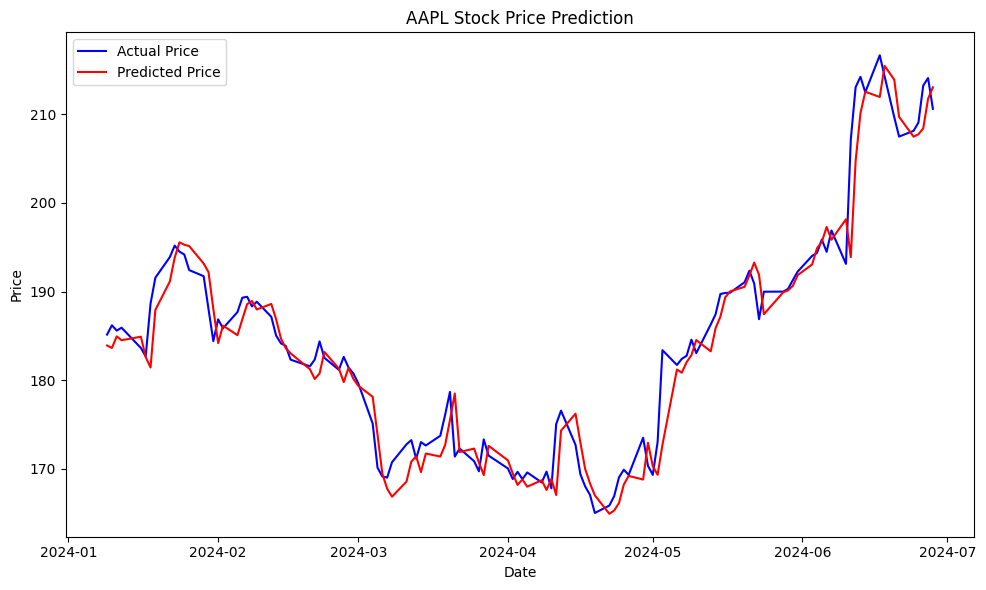

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(test_dates, y_test_inv,label='Actual Price', color='blue')
plt.plot(test_dates, test_predictions, label='Predicted Price', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()